https://github.com/ageron/handson-ml3 

github z ktorego korzystamy

In [154]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns #biblioteka do wizualizacji danych
import  matplotlib.pyplot as plt #biblioteka do wizualizacji danych


plt.rc('font',size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('xtick',labelsize=10)

datapath = Path() / "housing"
housing = pd.read_csv(datapath / "housing.csv")


In [155]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [156]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [157]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [158]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [159]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


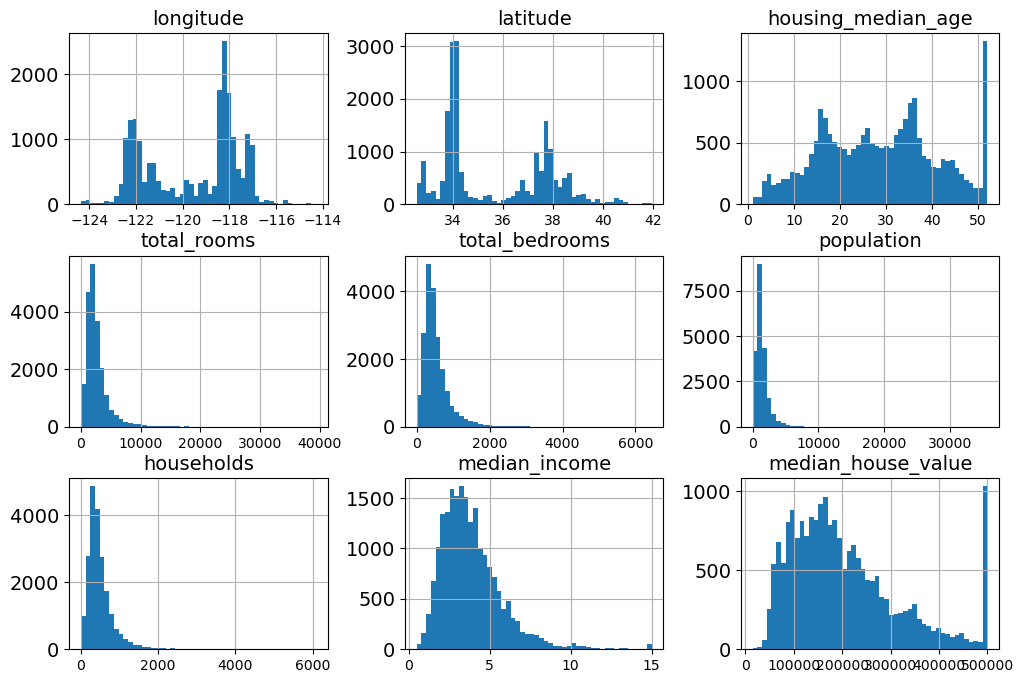

In [160]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1,2,3,4,5])


In [163]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

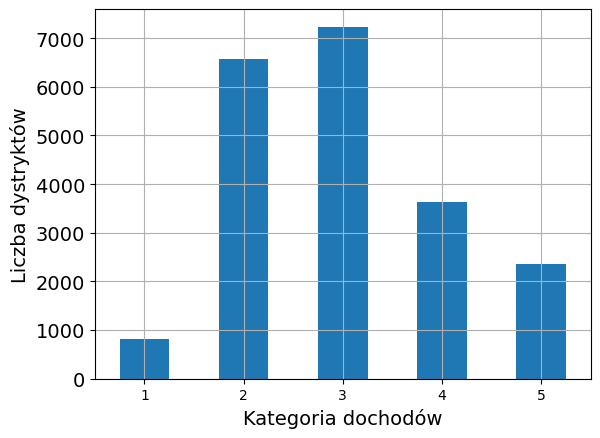

In [164]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Kategoria dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [165]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [166]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Łącznie %": income_cat_proportions(housing),
    "Warstwowe %": income_cat_proportions(df_test),
    "Losowe %": income_cat_proportions(df_test_rand_samp),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Bład - warstwowe %"] = (compare_props["Warstwowe %"] /
                                   compare_props["Łącznie %"] - 1)
compare_props["Bład - warstwowe %"] = (compare_props["Losowe %"] /
                                  compare_props["Łącznie %"] - 1)
(compare_props * 100).round(2)

,Łącznie %,Warstwowe %,Losowe %,Bład - warstwowe %
Income Category,,,,
1,3.98,4.00,4.24,6.45
2,31.88,31.88,30.74,-3.59
3,35.06,35.05,34.52,-1.53
4,17.63,17.64,18.41,4.42
5,11.44,11.43,12.09,5.63


In [167]:
for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [168]:
df_train_eda = df_train.copy()

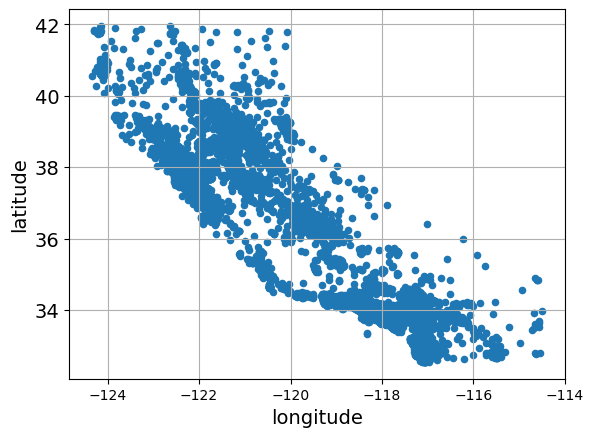

In [169]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

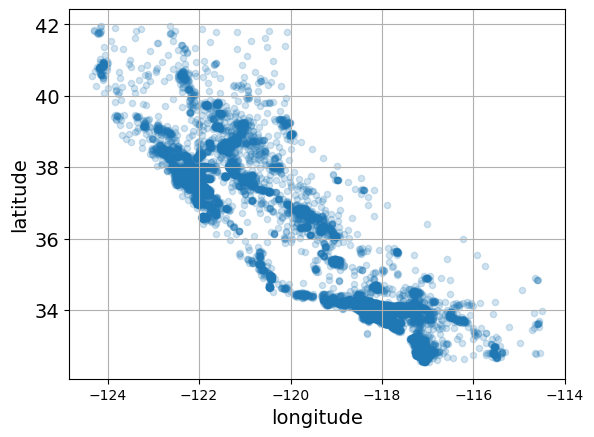

In [170]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

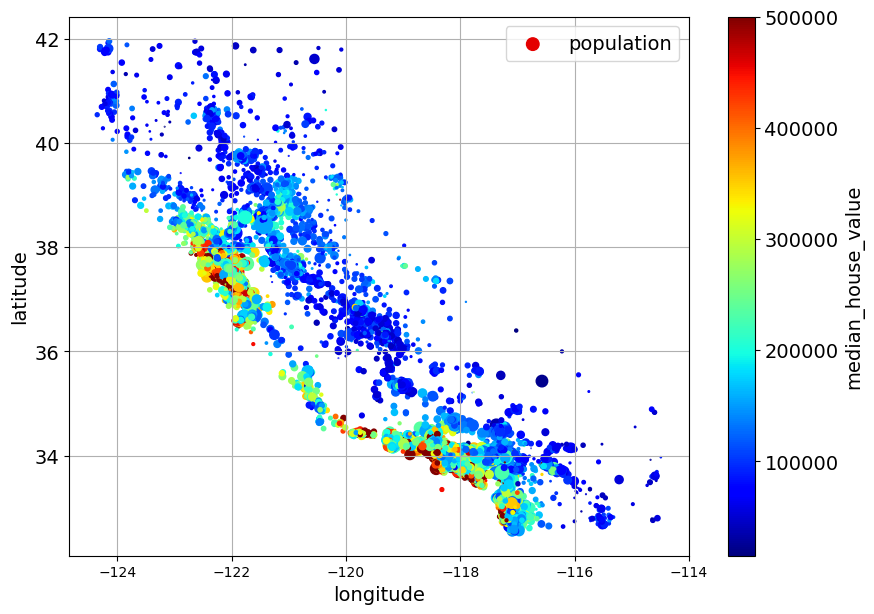

In [171]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_train_eda["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

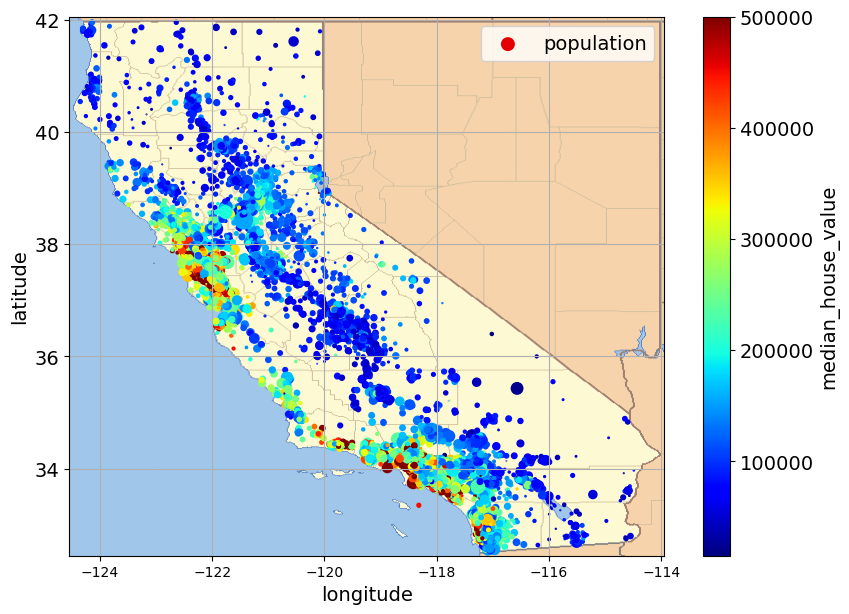

In [172]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_train_eda["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(datapath / "california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

In [173]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()

In [174]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

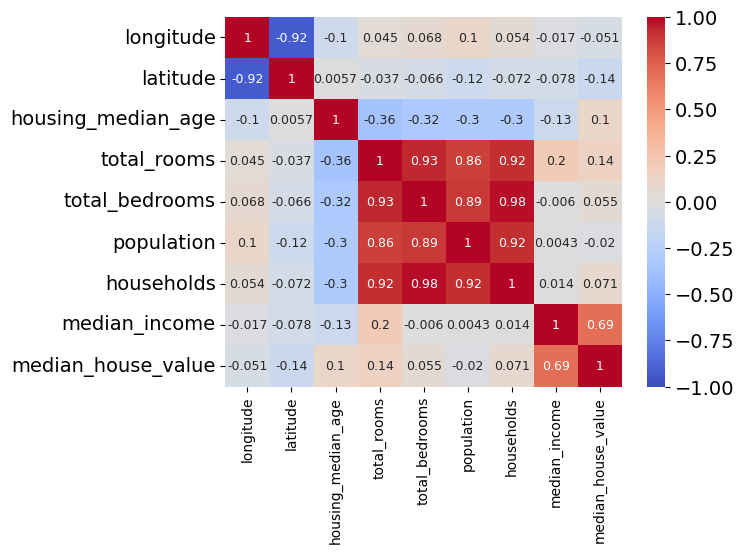

In [175]:
sns.heatmap(corr_matrix,
annot=True,
annot_kws={"size":9},
cmap='coolwarm',
vmin=-1,
vmax=1)

plt.show()

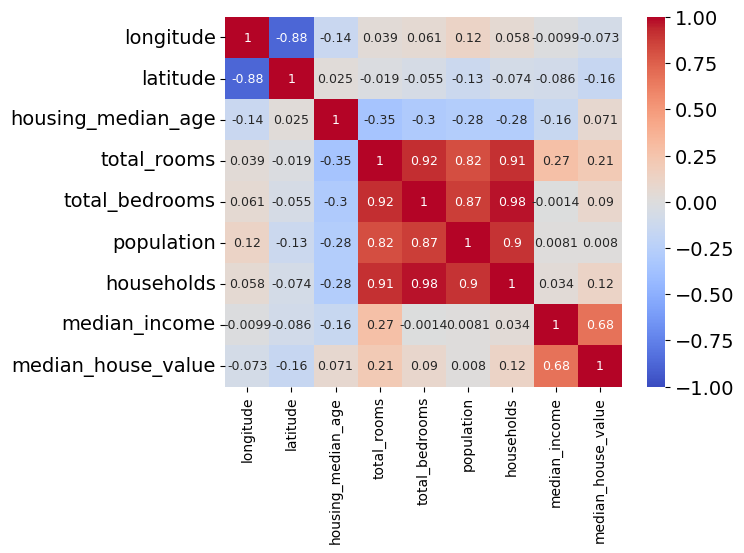

In [176]:
#Korelacja spearman

corr_matrix_spearman = df_train_eda.select_dtypes(np.number).corr(method = "spearman")
sns.heatmap(corr_matrix_spearman,
annot=True,
annot_kws={"size":9},
cmap='coolwarm',
vmin=-1,
vmax=1)

plt.show()

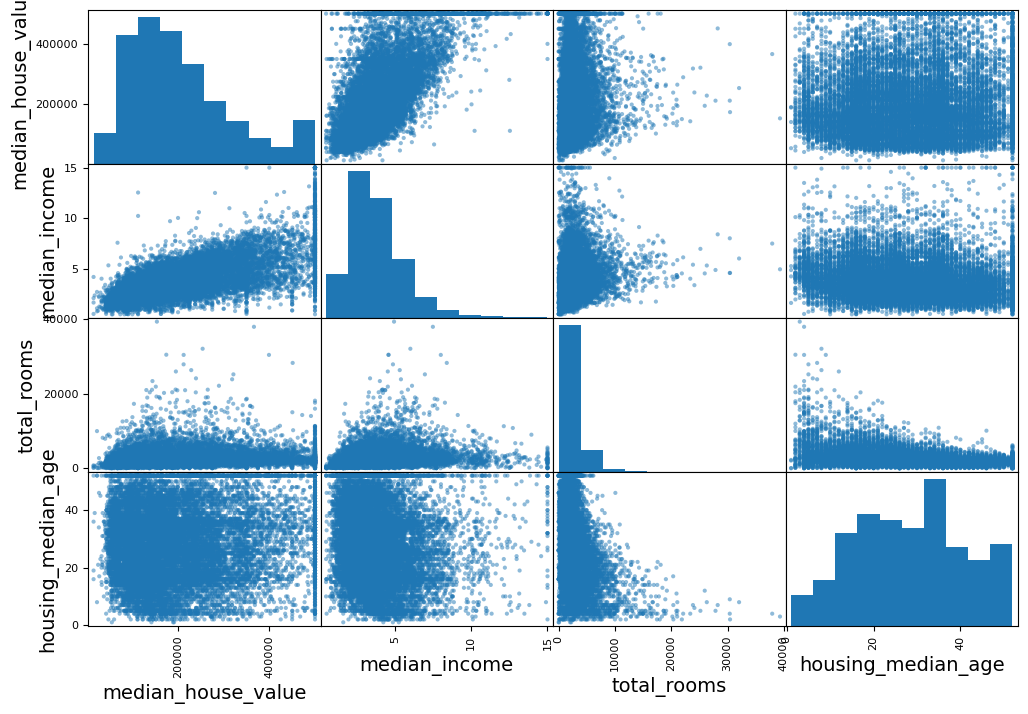

In [177]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12, 8))
plt.show()

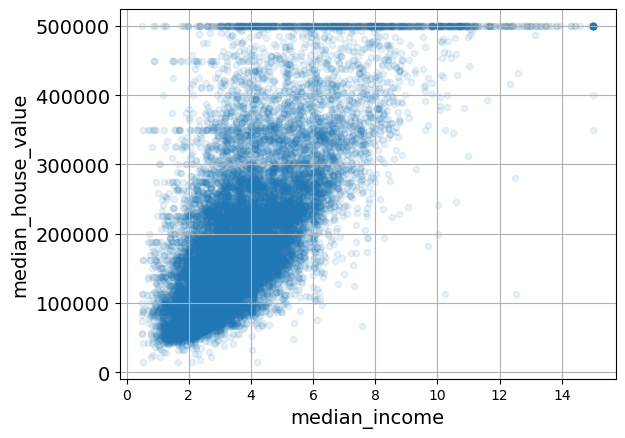

In [178]:
df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

In [179]:
df_train_eda["pokoje_na_rodzine"] = df_train_eda["total_rooms"] / df_train_eda["households"]
df_train_eda["współczynnik_sypialni"] = df_train_eda["total_bedrooms"] / df_train_eda["total_rooms"]
df_train_eda["liczba_osób_na_dom"] = df_train_eda["population"] / df_train_eda["households"]

In [180]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.688380
pokoje_na_rodzine        0.143663
total_rooms              0.137455
housing_median_age       0.102175
households               0.071426
total_bedrooms           0.054635
population              -0.020153
liczba_osób_na_dom      -0.038224
longitude               -0.050859
latitude                -0.139584
współczynnik_sypialni   -0.256397
Name: median_house_value, dtype: float64

In [181]:
x_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].copy()

In [182]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [183]:
df_train.isna().sum().sum()

168

In [184]:
null_rows_idx = x_train.isnull().any(axis=1)
x_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [185]:
x_train_option1 = x_train.copy()

x_train_option1.dropna(subset=["total_bedrooms"], inplace=True) #rozwiazanie 1
x_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [186]:
x_train_option2 = x_train.copy()

x_train_option2.drop("total_bedrooms", axis=1, inplace=True)  # rozwiazanie 2

x_train_option2.loc[null_rows_idx].head() #funkcja head pokazuje tlko 5 pierwszych wierszow

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [187]:
x_train_option3 = x_train.copy()

median = x_train["total_bedrooms"].median()
x_train_option3["total_bedrooms"].fillna(median, inplace=True)  #rozwiazanie 3

x_train_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [188]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [189]:
x_train_num = x_train.select_dtypes(include=[np.number])

In [190]:
imputer.fit(x_train_num)

SimpleImputer(strategy='median')

In [191]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [192]:
x_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [193]:
X = imputer.transform(x_train_num)

In [194]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])